In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import seaborn as sns

In [31]:
df = pd.read_csv('daily-minimum-temperatures.csv',header=0,index_col=0,parse_dates=True)
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [32]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [33]:
df.shape

(3650, 1)

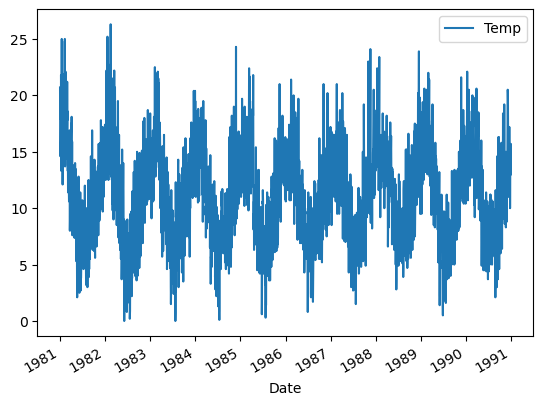

In [34]:
df.plot()
plt.show()

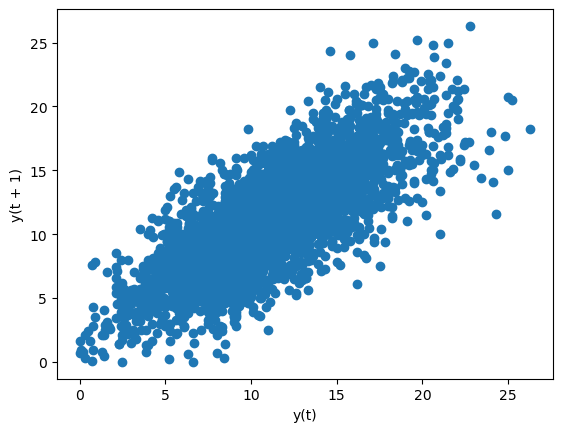

In [35]:
lag_plot(df)
plt.show()

sns.histplot(df, kde=True, stat="density")

In [36]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)


           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


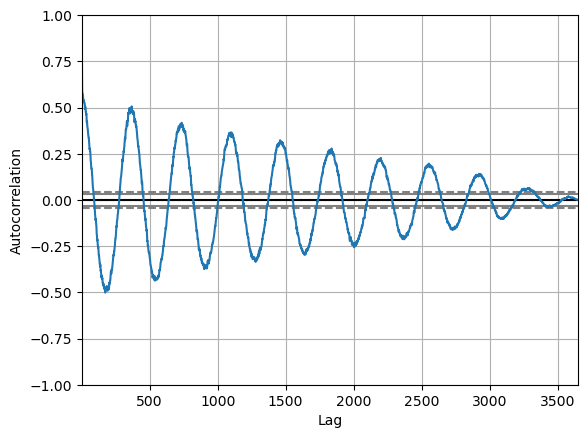

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()


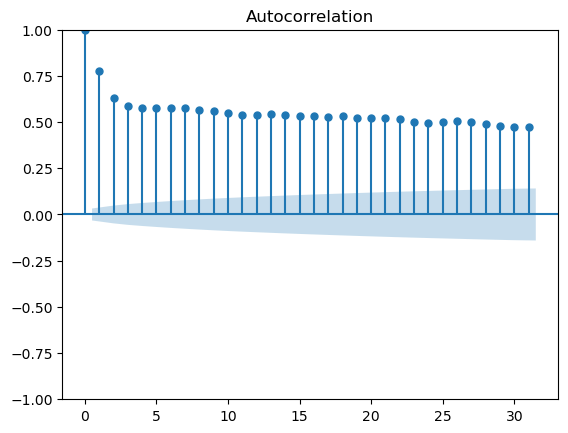

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=31)
plt.show()

In [39]:
import statsmodels.api as sm

def autoreg(endog, lags=1):
    
    lagged_data = pd.concat([endog.shift(i) for i in range(1, lags + 1)], axis=1)
    lagged_data.columns = [f'Lag_{i}' for i in range(1, lags + 1)]
    
    
    lagged_data = lagged_data.dropna()
    
    
    lagged_data = sm.add_constant(lagged_data)
    
    
    y = lagged_data['Lag_1']
    
    
    X = lagged_data.drop(['Lag_1'], axis=1)
    
    
    model = sm.OLS(y,X).fit()
    
    return model

Lag(k_ar): 29
Coefficients: [ 5.54321373e-01  5.86517460e-01 -9.30986167e-02  4.85749214e-02
  4.11770596e-02  4.05053496e-02  2.63499556e-02  4.13351857e-02
  1.70584573e-02  3.45559064e-02  1.64951771e-03  3.73937845e-03
  1.99783636e-02  2.27386855e-02  3.73355979e-03  2.38731188e-02
  7.93301755e-03  1.23846009e-02  3.79997501e-02 -1.10140915e-02
  2.81973262e-02  1.62584991e-02  1.08466595e-02 -1.91629127e-02
  5.04906251e-04  1.58942528e-02  2.18538896e-02  6.51964931e-03
  4.98534720e-03 -2.73656801e-03]
predicted=12.489350, expected=18.400000
predicted=11.409715, expected=13.600000
predicted=11.320542, expected=14.900000
predicted=11.505006, expected=14.800000
predicted=11.436999, expected=15.400000
predicted=11.522264, expected=11.800000
predicted=11.247836, expected=13.000000
predicted=11.118471, expected=11.100000
predicted=11.428950, expected=12.500000
predicted=11.477146, expected=18.300000
predicted=11.085180, expected=19.200000
predicted=11.076725, expected=15.400000
pre

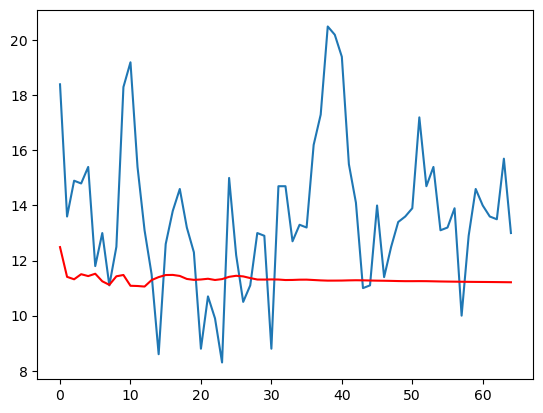

In [40]:
#AUTOREGRESSION MODEL
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt
from sklearn.metrics import mean_squared_error
X=df.values
train,test = X[1:len(X)-65], X[len(X)-65:]

lags=29
model = AutoReg(train,lags=29)
model_fit = model.fit()
print('Lag(k_ar): %s' % lags)
print('Coefficients: %s' % model_fit.params)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



predicted=12.489350, expected=18.400000
predicted=14.876415, expected=13.600000
predicted=12.054909, expected=14.900000
predicted=13.687618, expected=14.800000
predicted=13.386104, expected=15.400000
predicted=14.043349, expected=11.800000
predicted=11.593692, expected=13.000000
predicted=12.895488, expected=11.100000
predicted=11.850815, expected=12.500000
predicted=12.840517, expected=18.300000
predicted=15.456812, expected=19.200000
predicted=15.699992, expected=15.400000
predicted=13.583003, expected=13.100000
predicted=13.217082, expected=11.500000
predicted=12.381821, expected=8.600000
predicted=11.014841, expected=12.600000
predicted=13.453813, expected=13.800000
predicted=13.546902, expected=14.600000
predicted=13.940108, expected=13.200000
predicted=12.829764, expected=12.300000
predicted=12.563574, expected=8.800000
predicted=10.610326, expected=10.700000
predicted=12.146808, expected=9.900000
predicted=11.044542, expected=8.300000
predicted=10.493802, expected=15.000000
pred

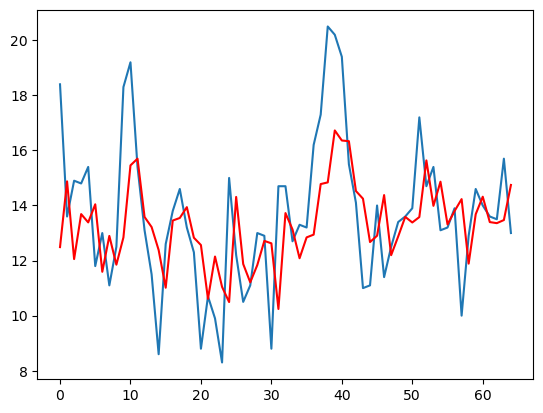

In [41]:
lags = 29

model = AutoReg(train, lags=lags)
model_fit = model.fit()


num_lags = len(model_fit.params) - 1

window = num_lags 
coef = model_fit.params
history = list(train)  
predictions = list()

for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length - window, length)]
    y = coef[0]
    for d in range(window):
        y += coef[d + 1] * lag[window - d - 1]
    obs = test[t]
    predictions.append(y)
    history.append(obs)
    print('predicted=%f, expected=%f' % (y, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Test RMSE: 2.510287


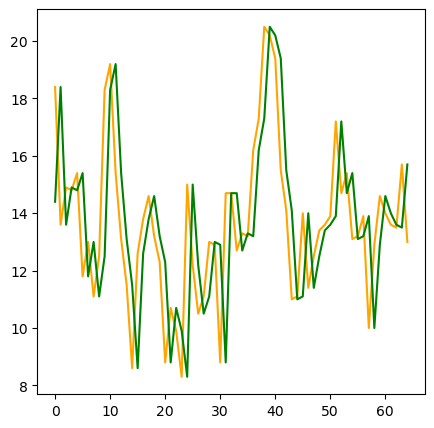

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt
values = DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
X = dataframe.values
train, test = X[1:len(X)-65], X[len(X)-65:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
def model_persistence(x):
    return x
predictions= list()
for x in test_X:
    y=model_persistence(x)
    predictions.append(y)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %3f'%rmse)
plt.figure(figsize=(5,5))
plt.plot(test_y,color='orange')
plt.plot(predictions,color='green')
plt.show()
        
